In [1]:
from IMPORTS import *

seed_value = 16
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

c:\Users\Shivesh\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Shivesh\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to en

Reading ATE json files

In [2]:
ATE_train = None
ATE_test = None
ATE_val = None
with open("Task1\processed\ATE_train.json") as f1:
    ATE_train  = json.load(f1)

with open("Task1\processed\ATE_test.json") as f2:
    ATE_test = json.load(f2)

with open("Task1\processed\ATE_val.json") as f3:
    ATE_val = json.load(f3)

Reading NER json files

In [3]:
NER_train = None
NER_test = None
NER_val = None
with open("Task1\processed\\NER_train.json") as f1:
    NER_train  = json.load(f1)

with open("Task1\processed\\NER_test.json") as f2:
    NER_test = json.load(f2)

with open("Task1\processed\\NER_val.json") as f3:
    NER_val = json.load(f3)

Loading the pre-trained models (Word2Vec, GloVE and fasttext)

In [4]:
word2vec = KeyedVectors.load_word2vec_format('WordEmbeddings/Word2Vec.bin',binary=True)

ATE Dataset

In [5]:
X_train_ate,Y_train_ate= create_train_test_val(ATE_train)
X_test_ate,Y_test_ate = create_train_test_val(ATE_test)
X_val_ate,Y_val_ate = create_train_test_val(ATE_val)

NER Dataset

In [6]:
X_train_ner,Y_train_ner = create_train_test_val(NER_train)
X_test_ner,Y_test_ner = create_train_test_val(NER_test)
X_val_ner,Y_val_ner = create_train_test_val(NER_val)

Tokenizing the ATE Dataset

In [7]:
X_train_ate_tokenized, toke = TokenCreator(X_train_ate,1)
X_test_ate_tokenized = TokenCreator(X_test_ate,0,tokenizer = toke)
X_val_ate_tokenized = TokenCreator(X_val_ate,0,tokenizer = toke)

Y_train_ate_tokenized,toke2 = TokenCreator(Y_train_ate,0)
Y_test_ate_tokenized = TokenCreator(Y_test_ate,0,tokenizer = toke2)
Y_val_ate_tokenized = TokenCreator(Y_val_ate,0,tokenizer = toke2)

Tokenizing the NER Dataset

In [8]:
X_train_ner_tokenized, toke = TokenCreator(X_train_ner,1)
X_test_ner_tokenized = TokenCreator(X_test_ner,0,tokenizer = toke)
X_val_ner_tokenized = TokenCreator(X_val_ner,0,tokenizer = toke)

Y_train_ner_tokenized,toke2 = TokenCreator(Y_train_ner,0)
Y_test_ner_tokenized = TokenCreator(Y_test_ner,0,tokenizer = toke2)
Y_val_ner_tokenized = TokenCreator(Y_val_ner,0,tokenizer = toke2)

Vocabulary of ATE

In [9]:
st1 = find_vocab(X_train_ate_tokenized)
vocab_size_ate  = len(st1) + 1 
vocab_size_ate

2406

Vocabulary of NER

In [10]:
st2 = find_vocab(X_train_ner_tokenized)
vocab_size_ner = len(st2) + 1
vocab_size_ner

30220

Padding ATE

In [11]:
X_padded_train = pad_sequences(X_train_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_train = pad_sequences(Y_train_ate_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_test = pad_sequences(X_test_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_test = pad_sequences(Y_test_ate_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_val = pad_sequences(X_val_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_val = pad_sequences(Y_val_ate_tokenized, maxlen=100, padding="pre", truncating="post")

Padding NER

In [12]:
X_padded_train_ner = pad_sequences(X_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_train_ner = pad_sequences(Y_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_test_ner = pad_sequences(X_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_test_ner = pad_sequences(Y_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_val_ner = pad_sequences(X_val_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_val_ner = pad_sequences(Y_val_ner_tokenized, maxlen=100, padding="pre", truncating="post") 

One hot encoding the ATE labels

In [13]:
Y_padded_train = to_categorical(Y_padded_train)
Y_padded_test = to_categorical(Y_padded_test)
Y_padded_val = to_categorical(Y_padded_val)

One hot encoding the NER labels

In [14]:
Y_padded_train_ner = to_categorical(Y_padded_train_ner)
Y_padded_test_ner = to_categorical(Y_padded_test_ner)
Y_padded_val_ner = to_categorical(Y_padded_val_ner)

Assigning ATE Word2Vec mapping

In [15]:
weights_ate_word2vec = np.zeros((vocab_size_ate, 300))

mapping_ate_word2vec = toke.word_index 
mapping_ate_word2vec

{'#UK': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'and': 6,
 'that': 7,
 'a': 8,
 'was': 9,
 'is': 10,
 'by': 11,
 'on': 12,
 'as': 13,
 'for': 14,
 'be': 15,
 'it': 16,
 'court': 17,
 'not': 18,
 'has': 19,
 'under': 20,
 'this': 21,
 'section': 22,
 'which': 23,
 'with': 24,
 'or': 25,
 'at': 26,
 'he': 27,
 'case': 28,
 'no.': 29,
 'from': 30,
 'been': 31,
 'his': 32,
 'an': 33,
 'had': 34,
 'are': 35,
 'were': 36,
 'v.': 37,
 'state': 38,
 'also': 39,
 'have': 40,
 'act': 41,
 'order': 42,
 'any': 43,
 'no': 44,
 'high': 45,
 'accused': 46,
 'learned': 47,
 'said': 48,
 'there': 49,
 'dated': 50,
 'supreme': 51,
 'made': 52,
 'would': 53,
 'before': 54,
 'singh': 55,
 'held': 56,
 'who': 57,
 'such': 58,
 'against': 59,
 'other': 60,
 'but': 61,
 'their': 62,
 'one': 63,
 'if': 64,
 'respondent': 65,
 'filed': 66,
 'appeal': 67,
 'appellant': 68,
 'evidence': 69,
 '&': 70,
 'all': 71,
 'only': 72,
 'decision': 73,
 'after': 74,
 'we': 75,
 'they': 76,
 'petitioner': 77,
 'govern

Assigning NER Word2Vec mapping

In [16]:
weights_ner_word2vec = np.zeros((vocab_size_ner, 300))

mapping_ner_word2vec = toke.word_index 
mapping_ner_word2vec

{'#UK': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'and': 6,
 'that': 7,
 'a': 8,
 'was': 9,
 'is': 10,
 'by': 11,
 'on': 12,
 'as': 13,
 'for': 14,
 'be': 15,
 'it': 16,
 'court': 17,
 'not': 18,
 'has': 19,
 'under': 20,
 'this': 21,
 'section': 22,
 'which': 23,
 'with': 24,
 'or': 25,
 'at': 26,
 'he': 27,
 'case': 28,
 'no.': 29,
 'from': 30,
 'been': 31,
 'his': 32,
 'an': 33,
 'had': 34,
 'are': 35,
 'were': 36,
 'v.': 37,
 'state': 38,
 'also': 39,
 'have': 40,
 'act': 41,
 'order': 42,
 'any': 43,
 'no': 44,
 'high': 45,
 'accused': 46,
 'learned': 47,
 'said': 48,
 'there': 49,
 'dated': 50,
 'supreme': 51,
 'made': 52,
 'would': 53,
 'before': 54,
 'singh': 55,
 'held': 56,
 'who': 57,
 'such': 58,
 'against': 59,
 'other': 60,
 'but': 61,
 'their': 62,
 'one': 63,
 'if': 64,
 'respondent': 65,
 'filed': 66,
 'appeal': 67,
 'appellant': 68,
 'evidence': 69,
 '&': 70,
 'all': 71,
 'only': 72,
 'decision': 73,
 'after': 74,
 'we': 75,
 'they': 76,
 'petitioner': 77,
 'govern

Fetching weights from pre trained Word2Vec model (ATE)

In [17]:
for word, index in mapping_ate_word2vec.items():
    if word in word2vec:
        weights_ate_word2vec[index:] = word2vec[word]

Fetching weights from pre trained Word2Vec model (NER)

In [18]:
for word, index in mapping_ner_word2vec.items():
    if word in word2vec:
        weights_ner_word2vec[index:] = word2vec[word]

Initializing the gru Model

In [19]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim = vocab_size_ate,output_dim = 300,input_length  = 100,weights = [weights_ate_word2vec],trainable = False))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(TimeDistributed(Dense(Y_padded_train.shape[2], activation='softmax')))

Compiling the gru Model

In [20]:
gru_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',Precision(),Recall()])

In [21]:
gru_f1_callback_val = F1ScoreCallback(data=(X_padded_val, Y_padded_val),name='validation')
gru_f1_callback_train=F1ScoreCallback(data=(X_padded_train, Y_padded_train),name='training')

In [22]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          721800    
                                                                 
 gru (GRU)                   (None, 100, 64)           70272     
                                                                 
 time_distributed (TimeDist  (None, 100, 4)            260       
 ributed)                                                        
                                                                 
Total params: 792332 (3.02 MB)
Trainable params: 70532 (275.52 KB)
Non-trainable params: 721800 (2.75 MB)
_________________________________________________________________


Fitting the gru model

In [23]:
gru_training = gru_model.fit(X_padded_train, Y_padded_train, batch_size=128, epochs=15, validation_data=(X_padded_val, Y_padded_val), callbacks=[gru_f1_callback_train,gru_f1_callback_val])

Epoch 1/15


29/29 [==============================] - 2s 31ms/step: 1.3140 - acc: 0.9499 - precision
training F1 Score: 0.8190506100654602
7/7 [==============================] - 0s 34ms/step
validation F1 Score: 0.8627610802650452
8/8 [==============================] - 19s 2s/step - loss: 1.3140 - acc: 0.9499 - precision: 0.9274 - recall: 0.0013 - val_loss: 1.1995 - val_acc: 0.9811 - val_precision: 0.9377 - val_recall: 0.0577
Epoch 2/15
29/29 [==============================] - 1s 42ms/step: 1.1196 - acc: 0.9807 - pr
training F1 Score: 0.8205118775367737
7/7 [==============================] - 0s 36ms/step
validation F1 Score: 0.8663089871406555
8/8 [==============================] - 9s 1s/step - loss: 1.1196 - acc: 0.9807 - precision: 0.9059 - recall: 0.1342 - val_loss: 0.9957 - val_acc: 0.9812 - val_precision: 0.9043 - val_recall: 0.1588
Epoch 3/15
29/29 [==============================] - 2s 68ms/step: 0.8927 - acc: 0.9
training F1 Score: 0.8154386878013611
7/7 [=======================

Testing accuracy

In [24]:
accuracy = gru_model.evaluate(X_padded_test, Y_padded_test, verbose = 1)
print(accuracy[1])

11/11 [==============================] - 0s 37ms/step - loss: 0.0949 - acc: 0.9780 - precision: 0.9782 - recall: 0.9675
0.9779573082923889


Testing F1 Score

In [25]:
Y_pred_ate = gru_model.predict(X_padded_test)
real = get_real(Y_padded_test)
pred = get_pred(Y_pred_ate)
f1 = F1Score(average='macro')
f1.update_state(real,pred)
f1_score = f1.result().numpy()
print(f"F1 Score ATE : {f1_score}")

11/11 [==============================] - 0s 35ms/step
F1 Score ATE : 0.7290516495704651


Plotting the graph

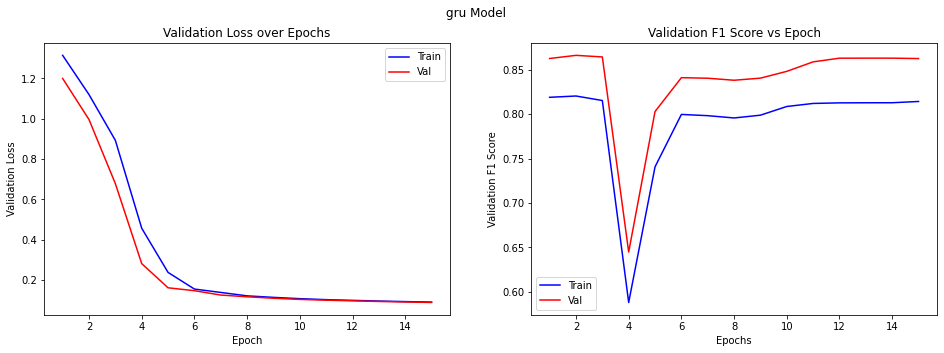

In [26]:
draw_loss_graph(gru_training, "gru Model", gru_f1_callback_train.f1_scores, gru_f1_callback_val.f1_scores)
save_model(gru_model, "gru","Word2Vec","t2")
loaded_model = load_model("Saved_Models/t2_gru_Word2Vec.pkl")